# MOA "Array Interface"

This is very much a work in progress. I want to see how far a python wrapper around a moa interface will take us.

In [1]:
from moa.frontend import LazyArray

In [6]:
A = LazyArray(name='A', shape=(3, 4))
B = LazyArray(name='B', shape=(3,))
C = LazyArray(name='C', shape=(3, 3))

expression = ((A.T)[0] - 1).outer('*', B) + C

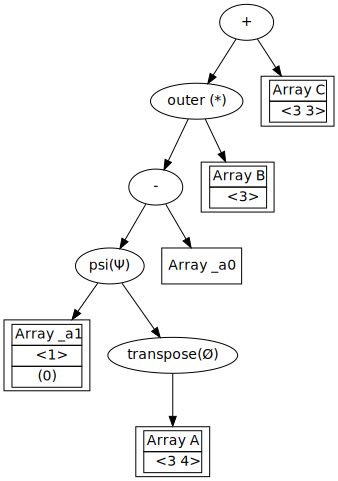

In [7]:
expression

In [8]:
print(expression.compile())



def f(A, B, C):
    
    if (not ((len(C.shape) == 2) and ((len(B.shape) == 1) and (len(A.shape) == 2)))):
        
        raise Exception('arguments have invalid dimension')
    
    if (not ((3 == C.shape[1]) and ((3 == C.shape[0]) and ((3 == B.shape[0]) and ((4 == A.shape[1]) and (3 == A.shape[0])))))):
        
        raise Exception('arguments have invalid shape')
    
    _a25 = Array((3, 3))
    
    for _i6 in range(0, 3):
        
        for _i5 in range(0, 3):
            
            _a25[(_i5, _i6)] = (((A[(_i5, 0)] - 1) * B[(_i6,)]) + C[(_i5, _i6)])
    return _a25


In [10]:
from moa.array import Array

A = Array(shape=(3, 4), value=(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12))
B = Array(shape=(3,), value=(13, 14, 15))
C = Array(shape=(3, 3), value=(16, 17, 18, 19, 20, 21, 22, 23, 24))

exec(expression.compile())

D = f(A=A, B=B, C=C)

print('shape', D.shape)
print('value', D.value)

shape (3, 3)
value [16, 17, 18, 71, 76, 81, 126, 135, 144]
